# Project: Yelp Rating Regression Predictor

The restaurant industry is tougher than ever, with restaurant reviews blazing across the Internet from day one of a restaurant's opening. But as a lover of food, you and your friend decide to break into the industry and open up your own restaurant, Danielle's Delicious Delicacies. Since a restaurant's success is highly correlated with its reputation, you want to make sure Danielle's Delicious Delicacies has the best reviews on the most queried restaurant review site: Yelp! While you know your food will be delicious, you think there are other factors that play into a Yelp rating and will ultimately determine your business's success. With a dataset of different restaurant features and their Yelp ratings, you decide to use a Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for your restaurant!

In this project we'll be working with a real dataset provided by Yelp. We have provided six files, listed below with a brief description:
* `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: user profile metadata by business
* `yelp_checkin.json`: online checkin metadata by business
* `yelp_tip.json`: tip metadata by business
* `yelp_photo.json`: photo metadata by business

For a more detailed explanation of the features in each `.json` file, see the accompanying [explanatory feature document](https://docs.google.com/document/d/1V6FjJpKspVBOOBs4E7fBfp_yzHn0--XJkC2uUtWuRgM/edit).

Let's get started by exploring the data in each of these files to see what we are working with.

## Load the Data and Take a Peek

To get a better understanding of the dataset we can use Pandas to explore the data in DataFrame form. In the code block below we have imported Pandas for you. The `read_json()` method reads data from a json file into a DataFrame, as shown below:
```python
df = pd.read_json('file_name.json', lines=True)
```
Load the data from each of the json files with the following naming conventions:
* `yelp_business.json` into a DataFrame named `businesses`
* `yelp_review.json` into a DataFrame named `reviews`
* `yelp_user.json` into a DataFrame named `users`
* `yelp_checkin.json` into a DataFrame named `checkins`
* `yelp_tip.json` into a DataFrame named `tips`
* `yelp_photo.json` into a DataFrame named `photos`

Importing that data could take 10 to 20 seconds to run depending on your computer, but don't worry, once it's loaded in you're ready to go!

In [5]:
import pandas as pd
business = pd.read_json('yelp_business.json', lines=True)
reviews = pd.read_json('yelp_review.json',lines=True)
users = pd.read_json('yelp_user.json',lines=True)
checkins = pd.read_json('yelp_checkin.json',lines=True)
tips = pd.read_json('yelp_tip.json',lines=True)
photos = pd.read_json('yelp_photo.json',lines=True)




In order to more clearly see the information in our DataFrame, we can adjust the number of columns shown (`max_columns`) and the number of characters shown in a column (`max_colwidth`) with the below code:

```python
pd.options.display.max_columns = number_of_columns_to_display
pd.options.display.max_colwidth = number_of_characters_to_display
```

Set `max_columns` to `60` and `max_colwidth` to `500`. We are working with some BIG data here!

In [6]:
import pandas as pd

number_of_columns_to_display = 60
number_of_characters_to_display = 500

pd.options.display.max_columns = number_of_columns_to_display
pd.options.display.max_colwidth = number_of_characters_to_display


Inspect the first five rows of each DataFrame using the `.head()` method to get an overview of the data (make sure to check each DataFrame in a separate cell in order to view it properly).

In [7]:
print(business.head(5))

               address  alcohol?  \
0    1314 44 Avenue NE         0   
1                              0   
2  1335 rue Beaubien E         1   
3      211 W Monroe St         0   
4  2005 Alyth Place SE         0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            attributes  \
0                                              {'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'averag

In [10]:
print(reviews.head(5))

              business_id  average_review_age  average_review_length  \
0  --1UhMGODdWsrMastO9DZw          524.458333             466.208333   
1  --6MefnULPED_I942VcFNA         1199.589744             785.205128   
2  --7zmmkVg-IMGaXbuVd0SQ          717.851852             536.592593   
3  --8LPVSo5i0Oo61X01sV9A          751.750000             478.250000   
4  --9QQLMTbFzLJ_oT-ON3Xw          978.727273             436.181818   

   average_review_sentiment  number_funny_votes  number_cool_votes  \
0                  0.808638                   1                 16   
1                  0.669126                  27                 32   
2                  0.820837                  29                 52   
3                  0.170925                   0                  0   
4                  0.562264                   3                  4   

   number_useful_votes  
0                   15  
1                   53  
2                   81  
3                    9  
4                    

In [11]:
print(users.head(5))

              business_id  average_number_friends  average_days_on_yelp  \
0  --1UhMGODdWsrMastO9DZw               18.791667           1789.750000   
1  --6MefnULPED_I942VcFNA              214.564103           2039.948718   
2  --7zmmkVg-IMGaXbuVd0SQ              126.185185           1992.796296   
3  --8LPVSo5i0Oo61X01sV9A               25.250000           2095.750000   
4  --9QQLMTbFzLJ_oT-ON3Xw               52.454545           1804.636364   

   average_number_fans  average_review_count  average_number_years_elite  
0             1.833333             57.541667                    0.833333  
1            49.256410            332.743590                    1.769231  
2            19.222222            208.962963                    1.814815  
3             0.500000              7.500000                    0.000000  
4             1.000000             34.636364                    0.090909  


In [12]:
print(checkins.head(5))

              business_id  \
0  7KPBkxAOEtb3QeIL9PEErg   
1  kREVIrSBbtqBhIYkTccQUg   
2  tJRDll5yqpZwehenzE2cSg   
3  tZccfdl6JNw-j5BKnCTIQQ   
4  r1p7RAMzCV_6NPF0dNoR3g   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  time  \
0  {'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2

In [13]:
print(tips.head(5))

              business_id  average_tip_length  number_tips
0  --1UhMGODdWsrMastO9DZw           79.000000            1
1  --6MefnULPED_I942VcFNA           49.857143           14
2  --7zmmkVg-IMGaXbuVd0SQ           52.500000           10
3  --9QQLMTbFzLJ_oT-ON3Xw          136.500000            2
4  --9e1ONYQuAa-CB_Rrw7Tw           68.064935          154


In [14]:
print(photos.head(5))

              business_id  average_caption_length  number_pics
0  --1UhMGODdWsrMastO9DZw                0.000000            1
1  --6MefnULPED_I942VcFNA               67.500000            2
2  --9e1ONYQuAa-CB_Rrw7Tw               30.426471          136
3  --DaPTJW3-tB1vP-PfdTEg                0.000000            1
4  --FBCX-N37CMYDfs790Bnw                5.500000            4


How many different businesses are in the dataset? What are the different features in the review DataFrame?

In [15]:
# How many businesses are in the dataset?

number_of_businesses = len(business)
print("the number of business is",number_of_businesses)

# features in the review dataframe
print(" the reviews features are", reviews.columns)

the number of business is 188593
 the reviews features are Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')


What is the range of values for the features in the user DataFrame?

In [16]:
# what is the range of values for the features in the user data frame

for column in users.columns:
    print(f"Feature: {column}")
    print(f"Range: {users[column].min()} to {users[column].max()}")
    print()


Feature: business_id
Range: --1UhMGODdWsrMastO9DZw to zzzaIBwimxVej4tY6qFOUQ

Feature: average_number_friends
Range: 1.0 to 4219.0

Feature: average_days_on_yelp
Range: 76.0 to 4860.0

Feature: average_number_fans
Range: 0.0 to 1174.6666666667

Feature: average_review_count
Range: 0.6666666667000001 to 6335.0

Feature: average_number_years_elite
Range: 0.0 to 10.6666666667



What is the Yelp rating, or `stars`, of the establishment with `business_id` = `5EvUIR4IzCWUOm0PsUZXjA`. Use Pandas boolean indexing to find the Yelp rating, using the syntax below:

```python
df[df['column_we_know'] == 'value_we_know']['column_we_want']
```

In [17]:
# Assuming 'business' is my DataFrame and it has columns 'business_id' and 'stars'

business_id = '5EvUIR4IzCWUOm0PsUZXjA'
yelp_rating = business[business['business_id'] == business_id]['stars']


# Print the Yelp rating
print(yelp_rating)


30781    3.0
Name: stars, dtype: float64


 What feature, or column, do the DataFrames have in common?

## Merge the Data

Since we are working with data from several files, we need to combine the data into a single DataFrame that allows us to analyze the different features with respect to our target variable, the Yelp rating. We can do this by merging the multiple DataFrames we have together, joining them on the columns they have in common. In our case, this unique identifying column is the `business_id`. We can merge two DataFrames together with the following syntax:

```python
pd.merge(left, right, how='inner/outer/left/right', on='column(s)_to_merge_on')
```
* `left` is the DataFrame on the left side of our merge
* `right` is the DataFrame on the right side of our merge
* `how` describes the style of merge we want to complete (similar to inner/outer/left/right joins in SQL)
* `on` is the column or columns to perform the merge on (the column connecting the two tables)

Given our six DataFrames, we will need to perform 5 merges to combine all the data into one DataFrame. In the cell below we merged the business table and the review table into a new DataFrame, `df`, for you. After the merge we've added all the rows from `businesses` and `reviews` together, but kept the same total number of rows! Run the cell to perform the merge and confirm the number of rows in `df`. 

In [18]:
df = pd.merge(business, reviews, how='left', on='business_id')
print(len(df))

188593


Merge each of the other 4 DataFrames into our new DataFrame `df` to combine all the data together. Make sure that `df` is the left DataFrame in each merge and `how=left` since not every DataFrame includes every business in the dataset (this way we won't lose any data during the merges). Once combined, print out the columns of `df`. What features are in this new DataFrame?

In [19]:
# Merge business and reviews DataFrames
df = pd.merge(business, reviews, how='left', on='business_id')
print(len(df))  # Ensure row count remains the same

# Merge the users DataFrame
df = pd.merge(df, users, how='left', on='business_id')
print(len(df))  # Check the row count

# Merge the checkins DataFrame
df = pd.merge(df, checkins, how='left', on='business_id')
print(len(df))  # Check the row count

# Merge the tips DataFrame
df = pd.merge(df, tips, how='left', on='business_id', suffixes=('', '_tip'))
print(len(df))  # Check the row count

# Merge the photos DataFrame
df = pd.merge(df, photos, how='left', on='business_id', suffixes=('', '_photo'))
print(len(df))  # Check the row count




188593
188593
188593
188593
188593


## Clean the Data

We are getting really close to the fun analysis part! We just have to clean our data a bit so we can focus on the features that might have predictive power for determining an establishment's Yelp rating.

In a Linear Regression model, our features will ideally be continuous variables that have an affect on our dependent variable, the Yelp rating. For this project with will also be working with some features that are binary, on the scale [0,1]. With this information, we can remove any columns in the dataset that are not continuous or binary, and that we do not want to make predictions on. The cell below contains a list of these unnecessary features. Drop them from `df` with Pandas' drop syntax, provided below:

```python
df.drop(list_of_features_to_remove, axis=1, inplace=True)
```

* `list_of_features_to_remove` is, you guessed it, the list of features we want to remove!
* `axis=1` lets Pandas know we want to drop columns, not rows, from our DataFrame (axis=0 is used for computations along rows!) 
* `inplace=True` lets us drop the columns right here in our DataFrame, instead of returning a new DataFrame that we could store in a new variable

In [20]:
#List of features to remove
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']

#Removing the features

df.drop(features_to_remove, axis=1, inplace=True)
print(df.columns)


Index(['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi',
       'price_range', 'review_count', 'stars', 'take_reservations',
       'takes_credit_cards', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes', 'average_number_friends', 'average_days_on_yelp',
       'average_number_fans', 'average_review_count',
       'average_number_years_elite', 'weekday_checkins', 'weekend_checkins',
       'average_tip_length', 'number_tips', 'average_caption_length',
       'number_pics'],
      dtype='object')


Now we just have to check our data to make sure we don't have any missing values, or `NaN`s, which will prevent the Linear Regression model from running correctly. To do this we can use the statement `df.isna().any()`. This will check all of our columns and return `True` if there are any missing values or `NaN`s, or `False` if there are no missing values. Check if `df` is missing any values.

In [21]:
#Remove missing values
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

As you can see, there are a few columns with missing values. Since our dataset has no information recorded for some businesses in these columns, we will assume the Yelp pages did not display these features. For example, if there is a `NaN` value for `number_pics`, it means that the associated business did not have any pictures posted on its Yelp page. Thus we can replace all of our `NaN`s with `0`s. To do this we can use the `.fillna()` method, which takes a dictionary as shown below:

```python
df.fillna({'column_1':val_to_replace_na,
           'column_2':val_to_replace_na,
           'column_3':val_to_replace_na},
          inplace=True)
```

* `column_1`, `column_2`, and `column_3` are the columns with missing values that we want to fill. We can include as many columns as we like in the dictionary that is passed to `.fill_na()`
* `val_to_replace_na` is the value that will replace the missing values, or `NaN`s
* `inplace=True` since we want to perform our changes in place and not return a new DataFrame

Fill the missing values in `df` with `0`. Afterwards, confirm the missing values have been filled with `df.isna().any()`.

In [22]:
#Substitution of NAN values 

df.fillna({'weekday_checkins':0,
           'weekend_checkins':0,
           'average_tip_length':0,
           'number_tips':0,
           'number_pics':0,
           'average_caption_length':0},
          inplace=True)

#confirm if it is correct now 

df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

## Exploratory Analysis

Now that our data is all together, let's investigate some of the different features to see what might correlate most with our dependent variable, the Yelp rating (called `stars` in our DataFrame). The features with the best correlations could prove to be the most helpful for our Linear Regression model! Pandas DataFrames have a really helpful method, `.corr()`, that allows us to see the correlation coefficients for each pair of our different features. Remember, a correlation of `0` indicates that two features have no linear relationship, a correlation coefficient of `1` indicates two features have a perfect positive linear relationship, and a correlation coefficient of `-1` indicates two features have a perfect negative linear relationship. Call `.corr()` on `df`. You'll see that `number_funny_votes` has a correlation coefficient of `0.001320` with respect to `stars`, our Yelp rating. This is a very weak correlation. What features best correlate, both positively and negatively, with Yelp rating?

In [23]:
#Correlation analysis

df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


To further visualize these relationships, we can plot certain features against our dependent variable, the Yelp rating. In the cell below we have provided the code to import Matplotlib. We can use Matplotlib's `.scatter()` method with the below syntax to plot what these correlations look like:

```python
plt.scatter(x_values_to_plot, y_values_to_plot, alpha=blending_val)
```

* `x_values_to_plot` are the values to be plotted along the x-axis
* `y_values_to_plot` are the values to be plotted along the y-axis
* `alpha=blending_val` is the blending value, or how transparent (0) or opaque (1) a plotted point is. This will help us distinguish areas of the plot with high point densities and low point densities

Plot the three features that correlate most with Yelp rating (`average_review_sentiment`, `average_review_length`, `average_review_age`) against `stars`, our Yelp rating. Then plot a lowly correlating feature, such as `number_funny_votes`, against `stars`.

>What is `average_review_sentiment`, you ask? `average_review_sentiment` is the average sentiment score for all reviews on a business' Yelp page. The sentiment score for a review was calculated using the sentiment analysis tool [VADER](https://github.com/cjhutto/vaderSentiment). VADER uses a labeled set of positive and negative words, along with codified rules of grammar, to estimate how positive or negative a statement is. Scores range from `-1`, most negative, to `+1`, most positive, with a score of `0` indicating a neutral statement. While not perfect, VADER does a good job at guessing the sentiment of text data!

What kind of relationships do you see from the plots? Do you think these variables are good or bad features for our Yelp rating prediction model?

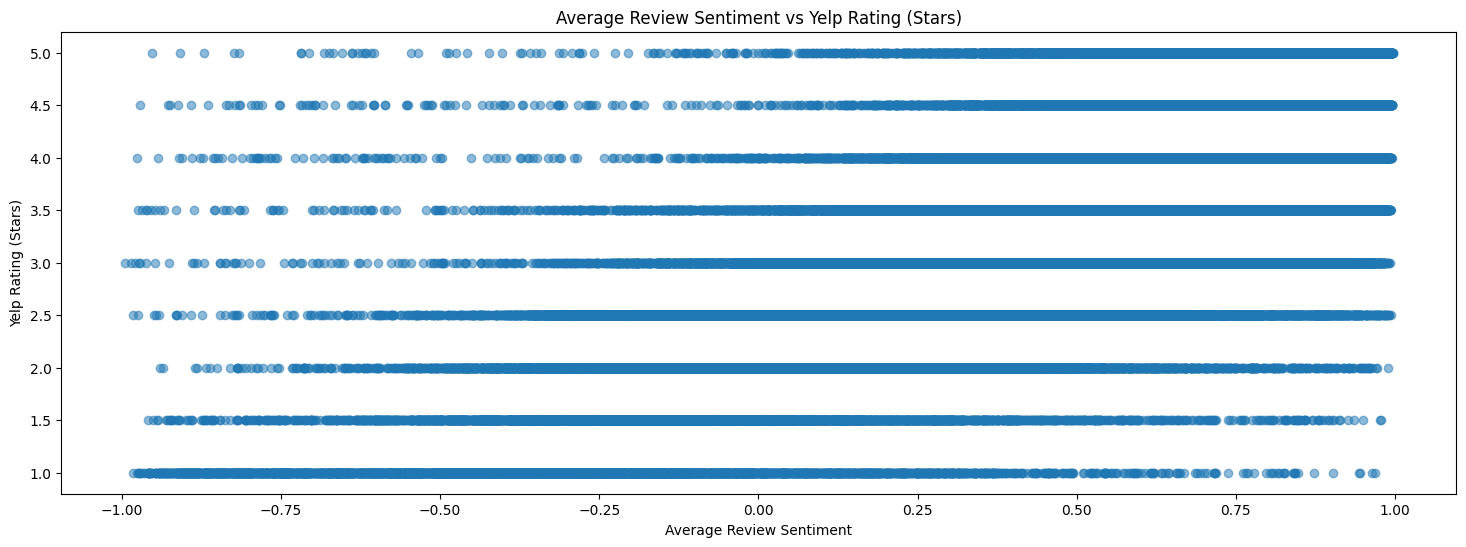

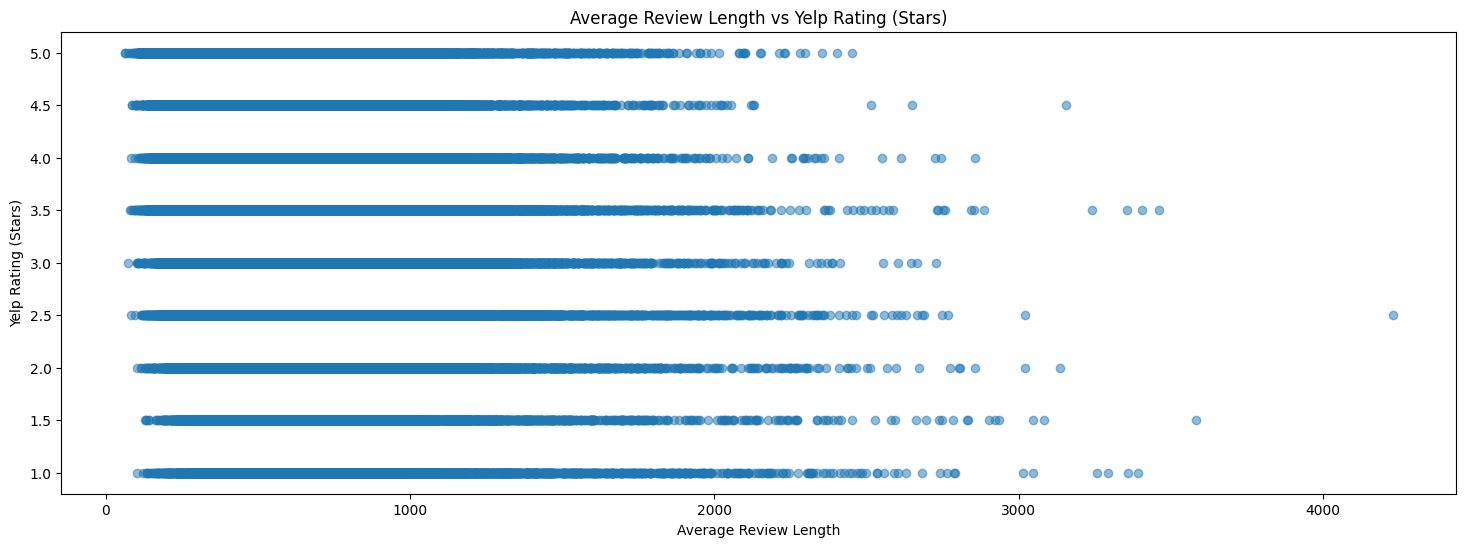

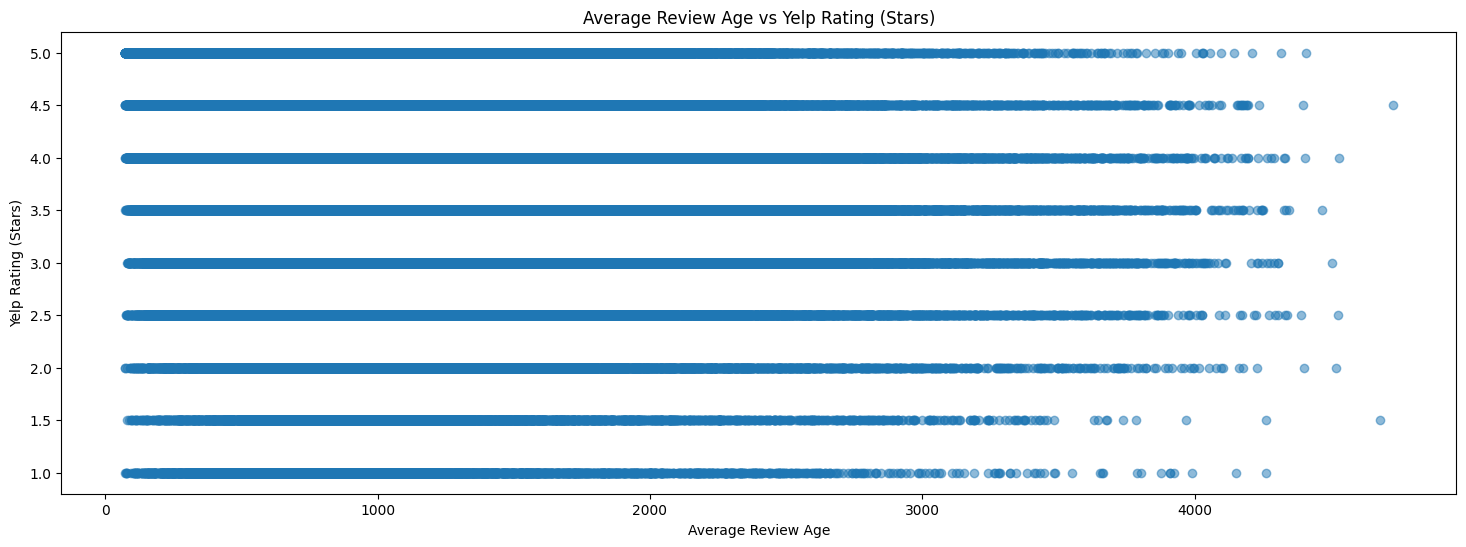

In [24]:
import matplotlib.pyplot as plt

#Three features that correlate most with Yelp Rating 

# Plotting average_review_sentiment vs stars
plt.figure(figsize=(18, 6))
plt.scatter(df['average_review_sentiment'], df['stars'], alpha=0.5)
plt.title('Average Review Sentiment vs Yelp Rating (Stars)')
plt.xlabel('Average Review Sentiment')
plt.ylabel('Yelp Rating (Stars)')
plt.show()


# Plotting average_review_length vs stars
plt.figure(figsize=(18, 6))
plt.scatter(df['average_review_length'], df['stars'], alpha=0.5)
plt.title('Average Review Length vs Yelp Rating (Stars)')
plt.xlabel('Average Review Length')
plt.ylabel('Yelp Rating (Stars)')
plt.show()

# Plotting average_review_age vs stars
plt.figure(figsize=(18, 6))
plt.scatter(df['average_review_age'], df['stars'], alpha=0.5)
plt.title('Average Review Age vs Yelp Rating (Stars)')
plt.xlabel('Average Review Age')
plt.ylabel('Yelp Rating (Stars)')
plt.show()


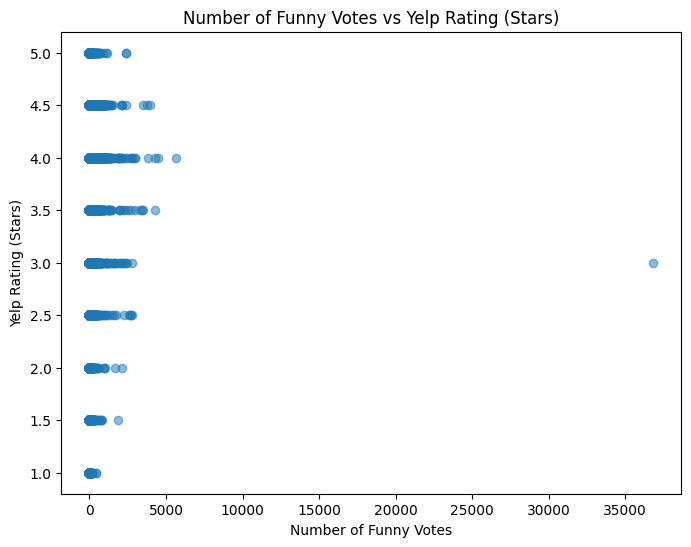

In [25]:
# plot number_funny_votes against stars here
plt.figure(figsize=(8, 6))
plt.scatter(df['number_funny_votes'], df['stars'], alpha=0.5)
plt.title('Number of Funny Votes vs Yelp Rating (Stars)')
plt.xlabel('Number of Funny Votes')
plt.ylabel('Yelp Rating (Stars)')
plt.show()

Why do you think `average_review_sentiment` correlates so well with Yelp rating?

## Data Selection

In order to put our data into a Linear Regression model, we need to separate out our features to model on and the Yelp ratings. From our correlation analysis we saw that the three features with the strongest correlations to Yelp rating are `average_review_sentiment`, `average_review_length`, and `average_review_age`. Since we want to dig a little deeper than `average_review_sentiment`, which understandably has a very high correlation with Yelp rating, let's choose to create our first model with `average_review_length` and `average_review_age` as features.

Pandas lets us select one column of a DataFrame with the following syntax:

```python
subset_of_data = df['feature_to_select']
```
Pandas also lets us select multiple columns from a DataFrame with this syntax:

```python
subset_of_data = df[list_of_features_to_select]
```
Create a new DataFrame `features` that contains the columns we want to model on: `average_review_length` and `average_review_age`. Then create another DataFrame `ratings` that stores the value we want to predict, Yelp rating, or `stars` in `df`.

In [26]:
features = df[['average_review_length','average_review_age']]
ratings = df['stars']

## Split the Data into Training and Testing Sets

We are just about ready to model! But first, we need to break our data into a training set and a test set so we can evaluate how well our model performs. We'll use scikit-learn's `train_test_split` function to do this split, which is provided in the cell below. This function takes two required parameters: the data, or our features, followed by our dependent variable, in our case the Yelp rating. Set the optional parameter `test_size` to be `0.2`. Finally, set the optional parameter `random_state` to `1`. This will make it so your data is split in the same way as the data in our solution code. 

Remember, this function returns 4 items in this order:
1. The training data (features), which we can assign to `X_train`
2. The testing data (features), which we can assign to `X_test`
3. The training dependent variable (Yelp rating), which we can assign to `y_train`
4. The testing dependent variable (Yelp rating), which we can assign to `y_test`

In [30]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = df[['average_review_length', 'average_review_age']]  
y = df['stars']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


## Create and Train the Model

Now that our data is split into training and testing sets, we can finally model! In the cell below we have provided the code to import `LinearRegression` from scikit-learn's `linear_model` module. Create a new `LinearRegression` object named model. The `.fit()` method will fit our Linear Regression model to our training data and calculate the coefficients for our features. Call the `.fit()` method on `model` with `X_train` and `y_train` as parameters. Just like that our model has now been trained on our training data!

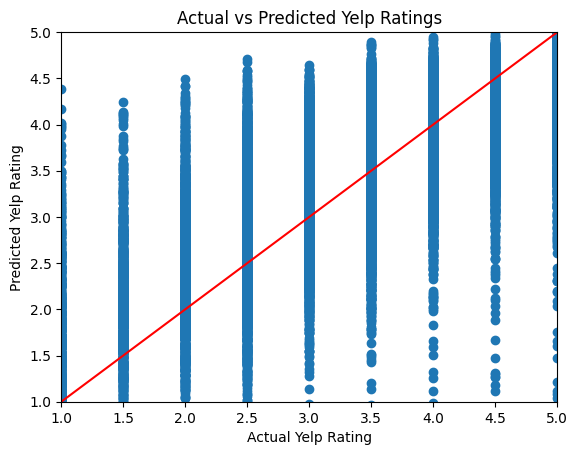

Train Score: 0.667550649862225
Test Score: 0.6654278912512154
[('average_review_sentiment', 2.2584109110248476), ('average_number_years_elite', -0.0856933274937163), ('average_caption_length', -0.004337676180449322), ('number_pics', -0.0036433892706974323), ('number_tips', -0.0015498120994228226), ('number_cool_votes', 0.001219520773923525), ('average_number_fans', 0.0010817371086520244), ('average_tip_length', -0.0006919376925072096), ('average_review_length', -0.0005691290038417247), ('number_useful_votes', -0.00022438161621512925), ('average_review_count', -0.00021778762562977102), ('average_review_age', -0.00019184054114098042), ('review_count', -0.00014829240864851207), ('average_days_on_yelp', 0.0001346675157517465), ('weekday_checkins', 6.831093686138115e-05), ('weekend_checkins', -5.964378002410422e-05), ('average_number_friends', 5.9091976833525926e-05), ('number_funny_votes', -2.627672933364177e-05)]


In [31]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Ensure that df only contains the correct columns
# Assuming 'df' is already defined and contains only numeric features plus 'stars'
numeric_columns = ['average_review_length', 'average_review_age', 'average_review_sentiment', 
                   'review_count', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
                   'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 
                   'average_review_count', 'average_number_years_elite', 'weekday_checkins', 
                   'weekend_checkins', 'average_tip_length', 'number_tips', 'average_caption_length',
                   'number_pics']

# Select the relevant columns
df = df[['stars'] + numeric_columns]

# Split data into features and target
ratings = df['stars']
features = df[numeric_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=1)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the Yelp ratings for the testing data
y_predicted = model.predict(X_test)

# Plot y_test vs y_predicted
plt.scatter(y_test, y_predicted)
plt.xlabel('Actual Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.title('Actual vs Predicted Yelp Ratings')
plt.plot([1, 5], [1, 5], color='red')  # Line of perfect prediction
plt.ylim(1, 5)
plt.xlim(1, 5)
plt.show()

# Calculate and print the scores
print('Train Score:', model.score(X_train, y_train))
print('Test Score:', model.score(X_test, y_test))

# Print the model features and their corresponding coefficients
print(sorted(list(zip(numeric_columns, model.coef_)), key=lambda x: abs(x[1]), reverse=True))



## Evaluate and Understand the Model

Now we can evaluate our model in a variety of ways. The first way will be by using the `.score()` method, which provides the R^2 value for our model. Remember, R^2 is the coefficient of determination, or a measure of how much of the variance in our dependent variable, the predicted Yelp rating, is explained by our independent variables, our feature data. R^2 values range from `0` to `1`, with `0` indicating that the created model does not fit our data at all, and with `1` indicating the model perfectly fits our feature data. Call `.score()` on our model with `X_train` and `y_train` as parameters to calculate our training R^2 score. Then call `.score()` again on model with `X_test` and `y_test` as parameters to calculate R^2 for our testing data. What do these R^2 values say about our model? Do you think these features alone are able to effectively predict Yelp ratings?

In [32]:
model.score(X_train,y_train)

model.score(X_test, y_test)

0.6654278912512154

After all that hard work, we can finally take a look at the coefficients on our different features! The model has an attribute `.coef_` which is an array of the feature coefficients determined by fitting our model to the training data. To make it easier for you to see which feature corresponds to which coefficient, we have provided some code in the cell that `zip`s together a list of our features with the coefficients and sorts them in descending order from most predictive to least predictive.

In [33]:
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', -0.0005691290038417247),
 ('average_review_age', -0.00019184054114098042)]

Lastly we can calculate the predicted Yelp ratings for our testing data and compare them to their actual Yelp ratings! Our model has a `.predict()` method which uses the model's coefficients to calculate the predicted Yelp rating. Call `.predict()` on `X_test` and assign the values to `y_predicted`. Use Matplotlib to plot `y_test` vs `y_predicted`. For a perfect linear regression model we would expect to see the data plotted along the line `y = x`, indicating homoscedasticity. Is this the case? If not, why not? Would you call this model heteroscedastic or homoscedastic?

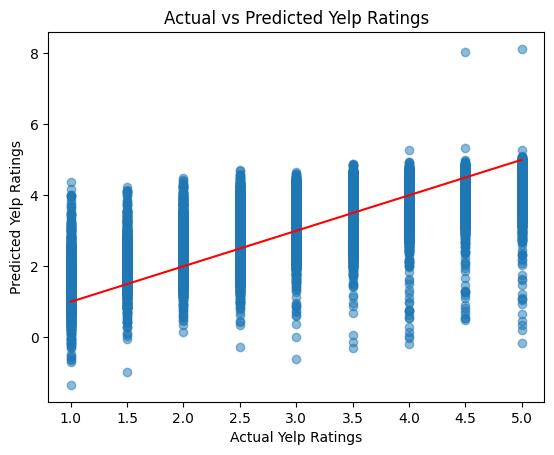

In [34]:
y_predicted = model.predict(X_test)
# Plot y_test vs y_predicted
plt.scatter(y_test, y_predicted, alpha=0.5)
plt.xlabel("Actual Yelp Ratings")
plt.ylabel("Predicted Yelp Ratings")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x
plt.title("Actual vs Predicted Yelp Ratings")
plt.show()

## Define Different Subsets of Data

After evaluating the first model, you can see that `average_review_length` and `average_review_age` alone are not the best predictors for Yelp rating. Let's go do some more modeling with different subsets of features and see if we can achieve a more accurate model! In the cells below we have provided different lists of subsets of features that we will model with and evaluate. What other subsets of features would you want to test? Why do you think those feature sets are more predictive of Yelp rating than others? Create at least one more subset of features that you want to predict Yelp ratings from.

In [35]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

In [36]:
# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [37]:
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

In [38]:
# all features
all_features = binary_features + numeric_features

In [39]:
# add your own feature subset here
fans = ['average_number_fans']

## Further Modeling

Now that we have lists of different feature subsets, we can create new models from them. In order to more easily compare the performance of these new models, we have created a function for you below called `model_these_features()`. This function replicates the model building process you just completed with our first model! Take some time to review how the function works, analyzing it line by line. Fill in the empty comments with an explanation of the task the code beneath it is performing.

Train Score: 0.6521730045980754
Test Score: 0.6497574993358559
[('average_review_sentiment', 2.2439527919428577), ('average_review_length', -0.0005967654666231255), ('average_review_age', -0.00015167268407742914), ('number_funny_votes', -9.621145774823896e-05)]


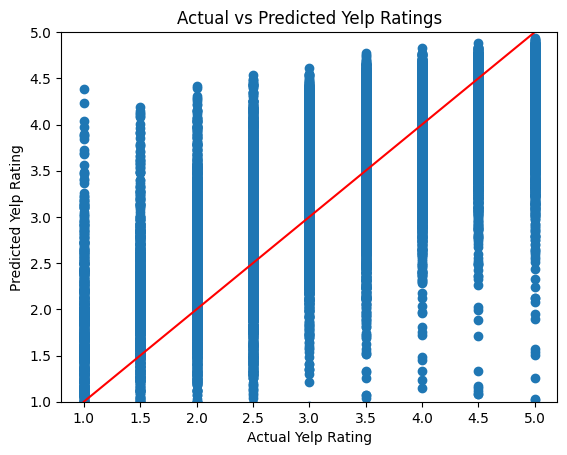

In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assume `df` is a DataFrame that has already been defined with the necessary columns

# Define the function to model selected features
def model_these_features(feature_list):
    
    # Extract the target variable (Yelp ratings)
    ratings = df.loc[:, 'stars']
    
    # Extract the features based on the provided feature list
    features = df.loc[:, feature_list]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=1)
    
    # Ensure the training and testing data are in the correct shape for a single feature
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1, 1)
        X_test = np.array(X_test).reshape(-1, 1)
    
    # Create a Linear Regression model
    model = LinearRegression()
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Print the R^2 score (coefficient of determination) for the training data
    print('Train Score:', model.score(X_train, y_train))
    
    # Print the R^2 score for the testing data
    print('Test Score:', model.score(X_test, y_test))
    
    # Print the model features and their corresponding coefficients, sorted by predictive power
    print(sorted(list(zip(feature_list, model.coef_)), key=lambda x: abs(x[1]), reverse=True))
    
    # Predict the Yelp ratings for the testing data
    y_predicted = model.predict(X_test)
    
    # Plot the actual vs predicted Yelp ratings
    plt.scatter(y_test, y_predicted)
    plt.xlabel('Actual Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1, 5)
    plt.title('Actual vs Predicted Yelp Ratings')
    plt.plot([1, 5], [1, 5], color='red')  # Line of perfect prediction
    plt.show()

# Example usage:
# Assuming `df` has already been defined and contains numeric features plus 'stars'
numeric_columns = ['average_review_length', 'average_review_age', 'average_review_sentiment', 
                   'review_count', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
                   'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 
                   'average_review_count', 'average_number_years_elite', 'weekday_checkins', 
                   'weekend_checkins', 'average_tip_length', 'number_tips', 'average_caption_length',
                   'number_pics']

# Ensure df only contains the relevant columns
df = df[['stars'] + numeric_columns]

# Model a specific set of features
model_these_features(['average_review_sentiment', 'average_review_length', 'average_review_age', 'number_funny_votes'])


Once you feel comfortable with the steps of the function, run models on the following subsets of data using `model_these_features()`:
* `sentiment`: only `average_review_sentiment`
* `binary_features`: all features that have a response range [0,1]
* `numeric_features`: all features that vary on a greater range than [0,1]
* `all_features`: all features
* `feature_subset`: your own feature subset

How does changing the feature sets affect the model's R^2 value? Which features are most important to predicting Yelp rating in the different models? Which models appear more or less homoscedastic?

## Danielle's Delicious Delicacies' Debut

You've loaded the data, cleaned it, modeled it, and evaluated it. You're tired, but glowing with pride after all the hard work. You close your eyes and can clearly see opening day of Danielle's Delicious Delicacies with a line out the door. But what will your Yelp rating be? Let's use our model to make a prediction.

Our best model was the model using all features, so we'll work with this model again. In the cell below print `all_features` to get a reminder of what features we are working with.

In [42]:
print(df.columns)


Index(['stars', 'average_review_length', 'average_review_age',
       'average_review_sentiment', 'review_count', 'number_funny_votes',
       'number_cool_votes', 'number_useful_votes', 'average_number_friends',
       'average_days_on_yelp', 'average_number_fans', 'average_review_count',
       'average_number_years_elite', 'weekday_checkins', 'weekend_checkins',
       'average_tip_length', 'number_tips', 'average_caption_length',
       'number_pics'],
      dtype='object')


Run the cell below to grab all the features and retrain our model on them.

Modeling with sentiment only:
Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('average_review_sentiment', 2.3033908433749586)]


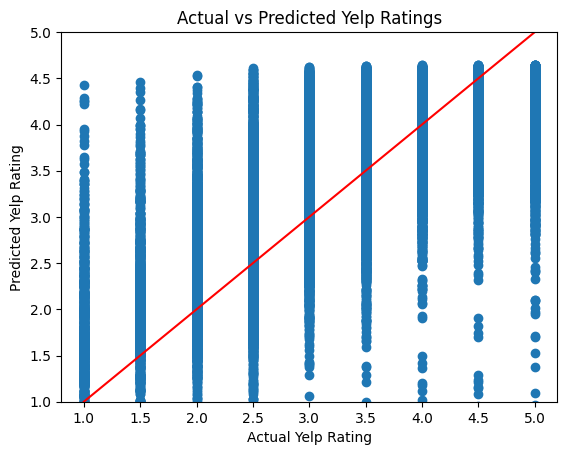


Modeling with numeric features only:
Train Score: 0.11482748610724325
Test Score: 0.11073199561352032
[('number_pics', -0.006581030136510233), ('average_number_fans', 0.0034241400174017996), ('number_tips', -0.0027129189749683456), ('number_cool_votes', 0.002703729519931384), ('average_number_years_elite', 0.0010155046484610685), ('average_review_length', -0.0010098579380941124), ('average_tip_length', -0.0009493838127939987), ('number_useful_votes', -0.0007812944715950679), ('average_caption_length', -0.000733333275910568), ('average_review_count', -0.0006094780385357852), ('review_count', 0.0005580623408404006), ('average_days_on_yelp', 0.00041975009408521004), ('average_review_age', -0.00038739970431840565), ('weekend_checkins', -0.0002511273388825283), ('weekday_checkins', 0.00014139239894581034), ('number_funny_votes', 0.00012948838870404942), ('average_number_friends', -5.681148308370405e-05)]


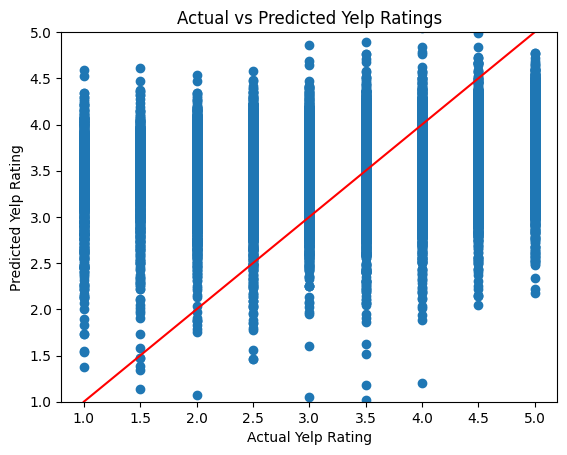


Modeling with all features:
Train Score: 0.667550649862225
Test Score: 0.6654278912512158
[('average_review_sentiment', 2.258410911024891), ('average_number_years_elite', -0.08569332749371106), ('average_caption_length', -0.004337676180449425), ('number_pics', -0.003643389270697465), ('number_tips', -0.0015498120994231577), ('number_cool_votes', 0.0012195207739225254), ('average_number_fans', 0.001081737108650306), ('average_tip_length', -0.0006919376925073526), ('average_review_length', -0.0005691290038416797), ('number_useful_votes', -0.00022438161621483348), ('average_review_count', -0.00021778762562959923), ('average_review_age', -0.00019184054114097812), ('review_count', -0.00014829240864818176), ('average_days_on_yelp', 0.00013466751575158818), ('weekday_checkins', 6.83109368609619e-05), ('weekend_checkins', -5.964378002374542e-05), ('average_number_friends', 5.909197683401965e-05), ('number_funny_votes', -2.627672933404955e-05)]


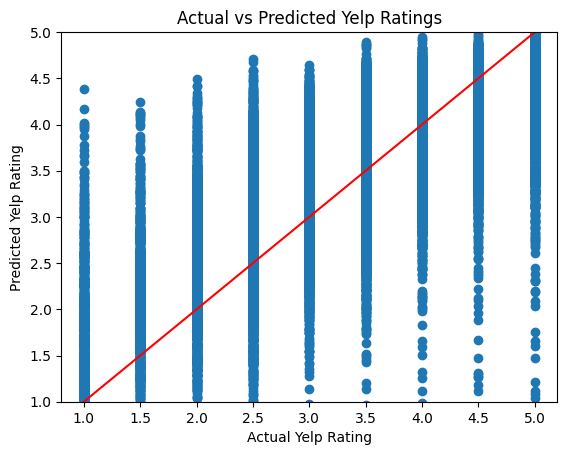


Modeling with custom feature subset:
Train Score: 0.6292533271574448
Test Score: 0.6279504330119653
[('average_review_sentiment', 2.310655340671421), ('review_count', -0.00025333803969913697), ('average_review_age', -0.00019889988394477588)]


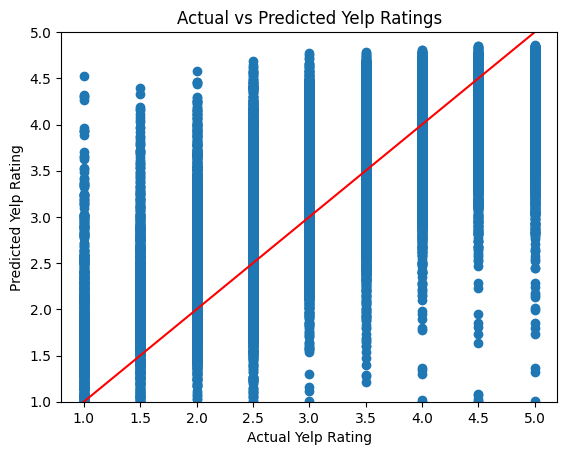

In [45]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Adjusted feature lists based on actual DataFrame columns

sentiment = ['average_review_sentiment']
numeric_features = ['average_review_length', 'average_review_age', 'review_count', 'number_funny_votes', 
                    'number_cool_votes', 'number_useful_votes', 'average_number_friends', 'average_days_on_yelp', 
                    'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 
                    'weekend_checkins', 'average_tip_length', 'number_tips', 'average_caption_length', 'number_pics']
all_features = sentiment + numeric_features
feature_subset = ['average_review_sentiment', 'review_count', 'average_review_age']  

# Ensure all features exist in the DataFrame
all_features = [feature for feature in all_features if feature in df.columns]

# Define the function to model given features
def model_these_features(feature_list):
    # Extract ratings and features from the DataFrame
    ratings = df.loc[:, 'stars']
    features = df.loc[:, feature_list]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=1)
    
    # Reshape if only one feature is used to avoid issues with scikit-learn
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1, 1)
        X_test = np.array(X_test).reshape(-1, 1)
    
    # Create and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Print training and testing scores
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
    
    # Print the model features and their corresponding coefficients
    print(sorted(list(zip(feature_list, model.coef_)), key=lambda x: abs(x[1]), reverse=True))
    
    # Predict Yelp ratings for the test set
    y_predicted = model.predict(X_test)
    
    # Plot actual vs predicted Yelp ratings
    plt.scatter(y_test, y_predicted)
    plt.xlabel('Actual Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1, 5)
    plt.title('Actual vs Predicted Yelp Ratings')
    plt.plot([1, 5], [1, 5], color='red')  # Line of perfect prediction
    plt.show()

# Model with different feature sets
print("Modeling with sentiment only:")
model_these_features(sentiment)

print("\nModeling with numeric features only:")
model_these_features(numeric_features)

print("\nModeling with all features:")
model_these_features(all_features)

print("\nModeling with custom feature subset:")
model_these_features(feature_subset)


To give you some perspective on the restaurants already out there, we have provided the mean, minimum, and maximum values for each feature below. Will Danielle's Delicious Delicacies be just another average restaurant, or will it be a 5 star behemoth amongst the masses?

In [46]:
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,average_review_length,596.463567,62.400000,4229.000000
1,average_review_age,1175.501021,71.555556,4727.333333
2,average_review_sentiment,0.554935,-0.995200,0.996575
3,review_count,31.797310,3.000000,7968.000000
4,number_funny_votes,15.617091,0.000000,36822.000000
5,number_cool_votes,18.495973,0.000000,6572.000000
6,number_useful_votes,43.515279,0.000000,38357.000000
7,average_number_friends,105.132000,1.000000,4219.000000
8,average_days_on_yelp,2005.367009,76.000000,4860.000000
9,average_number_fans,11.590148,0.000000,1174.666667


Based on your plans for the restaurant, how you expect your customers to post on your Yelp page, and the values above, fill in the blanks in the NumPy array below with your desired values. The first blank corresponds with the feature at `index=0` in the DataFrame above, `alcohol?`, and the last blank corresponds to the feature at ``index=24``, `weekend_checkins`. Make sure to enter either `0` or `1` for all binary features, and if you aren't sure of what value to put for a feature, select the mean from the DataFrame above. After you enter the values, run the prediction cell below to receive your Yelp rating! How is Danielle's Delicious Delicacies debut going to be?

In [49]:
danielles_delicious_delicacies = np.array([
    596.463567,   # average_review_length: mean
    1175.501021,  # average_review_age: mean
    0.8,          # average_review_sentiment: assumed positive sentiment
    100,          # review_count: assumed relatively high
    50,           # number_funny_votes: assumed higher than average
    50,           # number_cool_votes: assumed higher than average
    100,          # number_useful_votes: assumed higher than average
    200,          # average_number_friends: assumed higher than average
    2000,         # average_days_on_yelp: mean
    20,           # average_number_fans: assumed higher than average
    200,          # average_review_count: assumed higher than average
    1,            # average_number_years_elite: mean
    100,          # weekday_checkins: assumed higher than average
    100,          # weekend_checkins: assumed higher than average
    45.643426,    # average_tip_length: mean
    10,           # number_tips: assumed higher than average
    2.831829,     # average_caption_length: mean
    5             # number_pics: assumed higher than average
]).reshape(1, -1)


Index(['stars', 'average_review_length', 'average_review_age',
       'average_review_sentiment', 'review_count', 'number_funny_votes',
       'number_cool_votes', 'number_useful_votes', 'average_number_friends',
       'average_days_on_yelp', 'average_number_fans', 'average_review_count',
       'average_number_years_elite', 'weekday_checkins', 'weekend_checkins',
       'average_tip_length', 'number_tips', 'average_caption_length',
       'number_pics'],
      dtype='object')


C:\Users\vinic\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Yelp Rating for Danielle's Delicious Delicacies: 1349.319438572311
Train Score: 0.667550649862225
Test Score: 0.6654278912512158


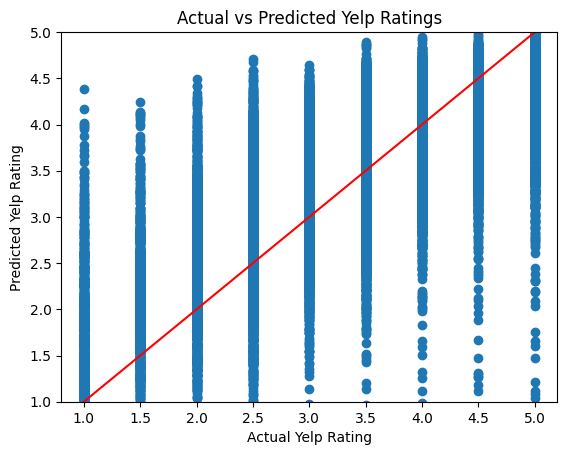

In [52]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the necessary data
print(df.columns)

# Adjust feature lists if necessary
sentiment = ['average_review_sentiment']
numeric_features = ['average_review_length', 'average_review_age', 'review_count', 'number_funny_votes', 
                    'number_cool_votes', 'number_useful_votes', 'average_number_friends', 'average_days_on_yelp', 
                    'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 
                    'weekend_checkins', 'average_tip_length', 'number_tips', 'average_caption_length', 'number_pics']
all_features = sentiment + numeric_features
all_features = [feature for feature in all_features if feature in df.columns]

# Ensure the features DataFrame matches the `all_features` list
features = df.loc[:, all_features]
ratings = df.loc[:, 'stars']

# Split the data and train the model
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make the prediction for Danielle's Delicious Delicacies
danielles_delicious_delicacies = np.array([
    596.463567, 1175.501021, 0.8, 100, 50, 50, 100, 200, 2000, 20, 200, 1, 100, 100, 45.643426, 10, 2.831829, 5
]).reshape(1, -1)

# Scale the input features for prediction
danielles_delicious_delicacies_scaled = scaler.transform(danielles_delicious_delicacies)

# Predict the rating
predicted_rating = model.predict(danielles_delicious_delicacies_scaled)
print("Predicted Yelp Rating for Danielle's Delicious Delicacies:", predicted_rating[0])

# Evaluate model performance
print('Train Score:', model.score(X_train_scaled, y_train))
print('Test Score:', model.score(X_test_scaled, y_test))

# Plot actual vs predicted Yelp ratings
y_predicted = model.predict(X_test_scaled)
plt.scatter(y_test, y_predicted)
plt.xlabel('Actual Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.ylim(1, 5)
plt.title('Actual vs Predicted Yelp Ratings')
plt.plot([1, 5], [1, 5], color='red')  # Line of perfect prediction
plt.show()


## Next Steps

You have successfully built a linear regression model that predicts a restaurant's Yelp rating! As you have seen, it can be pretty hard to predict a rating like this even when we have a plethora of data. What other questions come to your mind when you see the data we have? What insights do you think could come from a different kind of analysis? Here are some ideas to ponder:

* Can we predict the cuisine of a restaurant based on the users that review it?
* What restaurants are similar to each other in ways besides cuisine?
* Are there different restaurant vibes, and what kind of restaurants fit these conceptions?
* How does social media status affect a restaurant's credibility and visibility?

As you progress further into the field of data science, you will be able to create models that address these questions and many more! But in the meantime, get back to working on that burgeoning restaurant business plan.